# Lab - SQL 

## Task 0 - data ingestion 

### check the sakila databse

In [3]:
import duckdb 

with duckdb.connect("data/sakila.duckdb") as conn:
    description = conn.sql("DESC;").df() 

description

,database,schema,name,column_names,column_types,temporary
0,sakila,staging,_dlt_loads,"[load_id, schema_name, status, inserted_at, sc...","[VARCHAR, VARCHAR, BIGINT, TIMESTAMP WITH TIME...",False
1,sakila,staging,_dlt_pipeline_state,"[version, engine_version, pipeline_name, state...","[BIGINT, BIGINT, VARCHAR, VARCHAR, TIMESTAMP W...",False
2,sakila,staging,_dlt_version,"[version, engine_version, inserted_at, schema_...","[BIGINT, BIGINT, TIMESTAMP WITH TIME ZONE, VAR...",False
3,sakila,staging,actor,"[actor_id, first_name, last_name, last_update,...","[DECIMAL(38,9), VARCHAR, VARCHAR, TIMESTAMP, V...",False
4,sakila,staging,address,"[address_id, address, address2, district, city...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, BIGINT, VA...",False
5,sakila,staging,category,"[category_id, name, last_update, _dlt_load_id,...","[BIGINT, VARCHAR, TIMESTAMP, VARCHAR, VARCHAR]",False
6,sakila,staging,city,"[city_id, city, country_id, last_update, _dlt_...","[BIGINT, VARCHAR, BIGINT, TIMESTAMP, VARCHAR, ...",False
7,sakila,staging,country,"[country_id, country, last_update, _dlt_load_i...","[BIGINT, VARCHAR, TIMESTAMP, VARCHAR, VARCHAR]",False
8,sakila,staging,customer,"[customer_id, store_id, first_name, last_name,...","[BIGINT, BIGINT, VARCHAR, VARCHAR, VARCHAR, BI...",False
9,sakila,staging,film,"[film_id, title, description, release_year, la...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, BIGINT, BI...",False


### Storing data into dictionary of dfs()

In [4]:
dfs = {}

with duckdb.connect("data/sakila.duckdb") as conn: 
    for name in description["name"]: 
        #exclude if name starts with _  
        if name[0] != '_':
            dfs[name] = conn.sql(f"FROM staging.{name};").df()

            #register into duckdb database in the temp database  
            duckdb.register(name, dfs[name])

 

In [5]:
duckdb.sql("DESC;").df()

,database,schema,name,column_names,column_types,temporary
0,temp,main,actor,"[actor_id, first_name, last_name, last_update,...","[DOUBLE, VARCHAR, VARCHAR, TIMESTAMP, VARCHAR,...",True
1,temp,main,address,"[address_id, address, address2, district, city...","[BIGINT, VARCHAR, ""NULL"", VARCHAR, BIGINT, VAR...",True
2,temp,main,category,"[category_id, name, last_update, _dlt_load_id,...","[BIGINT, VARCHAR, TIMESTAMP, VARCHAR, VARCHAR]",True
3,temp,main,city,"[city_id, city, country_id, last_update, _dlt_...","[BIGINT, VARCHAR, BIGINT, TIMESTAMP, VARCHAR, ...",True
4,temp,main,country,"[country_id, country, last_update, _dlt_load_i...","[BIGINT, VARCHAR, TIMESTAMP, VARCHAR, VARCHAR]",True
5,temp,main,customer,"[customer_id, store_id, first_name, last_name,...","[BIGINT, BIGINT, VARCHAR, VARCHAR, VARCHAR, BI...",True
6,temp,main,film,"[film_id, title, description, release_year, la...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, BIGINT, BI...",True
7,temp,main,film_actor,"[actor_id, film_id, last_update, _dlt_load_id,...","[BIGINT, BIGINT, TIMESTAMP, VARCHAR, VARCHAR]",True
8,temp,main,film_category,"[film_id, category_id, last_update, _dlt_load_...","[BIGINT, BIGINT, TIMESTAMP, VARCHAR, VARCHAR]",True
9,temp,main,inventory,"[inventory_id, film_id, store_id, last_update,...","[BIGINT, BIGINT, BIGINT, TIMESTAMP, VARCHAR, V...",True


## Task 1 - EDA in python

#### A) - Which movies are longer than 3 hours (180 minutes), show the title and its length?

- By studying the Sakila database documentation I know that the lenght is in minutes 

In [6]:
movie_lenght = duckdb.sql(
"""
--sql
SELECT
    title, 
    length 
FROM main.film
WHERE length > 180
ORDER BY length desc;
""")

movie_lenght.df()

,title,length
0,WORST BANGER,185
1,CHICAGO NORTH,185
2,CONTROL ANTHEM,185
3,DARN FORRESTER,185
4,SWEET BROTHERHOOD,185
5,GANGS PRIDE,185
6,HOME PITY,185
7,SOLDIERS EVOLUTION,185
8,POND SEATTLE,185
9,MUSCLE BRIGHT,185


#### b) Which movies have the word "love" in its title? Show the following columns
- title
- rating
- length
- description

In [7]:
# Getting the titles containing word as a seperate word
word_in_movie_love = duckdb.sql("""
--sql
SELECT 
    title,
    rating, 
    length, 
    description                             
FROM main.film 
WHERE
    regexp_matches(title, '\\bLOVE\\b');

;
""")

word_in_movie_love.df()

,title,rating,length,description
0,GRAFFITI LOVE,PG,117,A Unbelieveable Epistle of a Sumo Wrestler And...
1,IDAHO LOVE,PG-13,172,A Fast-Paced Drama of a Student And a Crocodil...
2,INDIAN LOVE,NC-17,135,A Insightful Saga of a Mad Scientist And a Mad...
3,LAWRENCE LOVE,NC-17,175,A Fanciful Yarn of a Database Administrator An...
4,LOVE SUICIDES,R,181,A Brilliant Panorama of a Hunter And a Explore...


#### c) Calculate descriptive statistics on the length column, The Manager wants, shortest, average, median and longest movie length

In [8]:
film_length_values = duckdb.sql("""
--sql
SELECT 
    MAX(length) as max_length,
    MIN(length) as min_length,
    ROUND(AVG(length)) as avg_length, 
    MEDIAN(length) as median_length
FROM main.film
;
""")

film_length_values.df()

,max_length,min_length,avg_length,median_length
0,185,46,115.0,114.0


#### d) The rental rate is the cost to rent a movie and the rental duration is the number of days a customer can keep the movie. The Manager wants to know the 10 most expensive movies to rent per day.

In [9]:
ten_most_expensive_per_day = duckdb.sql("""
--sql
SELECT
    title, 
    rental_duration, 
    rental_rate, 
    (rental_rate / rental_duration) as cost_per_day
FROM main.film
ORDER BY cost_per_day desc
;
""")

#by using df I don't need to include the limit 10 in the sql code 
ten_most_expensive_per_day.df().head(10)

,title,rental_duration,rental_rate,cost_per_day
0,PATHS CONTROL,3,4.99,1.663333
1,BACKLASH UNDEFEATED,3,4.99,1.663333
2,BEHAVIOR RUNAWAY,3,4.99,1.663333
3,VIRTUAL SPOILERS,3,4.99,1.663333
4,TEEN APOLLO,3,4.99,1.663333
5,TELEGRAPH VOYAGE,3,4.99,1.663333
6,BILKO ANONYMOUS,3,4.99,1.663333
7,HEARTBREAKERS BRIGHT,3,4.99,1.663333
8,CLERKS ANGELS,3,4.99,1.663333
9,TIES HUNGER,3,4.99,1.663333


#### e) Which actors have played in most movies? Show the top 10 actors with the number of movies they have played in.

In [ ]:
top_10_actors_in_movies = duckdb.sql("""
--sql
SELECT
    a.actor_id, 
    a.first_name, 
    a.last_name, 
    COUNT(fa.film_id) as nr_of_movies
FROM 
    main.actor a 
INNER JOIN main.film_actor fa ON fa.actor_id = a.actor_id 
GROUP BY 
    a.actor_id, a.first_name, a.last_name
ORDER BY nr_of_movies DESC
;
""")

top_10_actors_in_movies.df().head(10)

,actor_id,first_name,last_name,nr_of_movies
0,107.0,GINA,DEGENERES,42
1,102.0,WALTER,TORN,41
2,198.0,MARY,KEITEL,40
3,181.0,MATTHEW,CARREY,39
4,23.0,SANDRA,KILMER,37
...,...,...,...,...
195,31.0,SISSY,SOBIESKI,18
196,186.0,JULIA,ZELLWEGER,16
197,199.0,JULIA,FAWCETT,15
198,35.0,JUDY,DEAN,15



#### f) Now it's time for you to choose your own question to explore the sakila database! Write down 3-5 questions you want to answer and then answer them using pandas and duckdb.


#### 1 - Are there customers which have rented the same movie more than once? Y/N?

In [393]:
rent_times_per_customer = duckdb.sql("""
--sql
SELECT
    c.first_name, 
    c.last_name,
    i.film_id, 
    r.customer_id, 
    COUNT(*) as times_rented
FROM main.inventory i 
INNER JOIN main.rental r ON r.inventory_id = i.inventory_id
INNER JOIN main.customer c ON c.customer_id = r.customer_id
GROUP BY 
    c.first_name, 
    c.last_name, 
    i.film_id, 
    r.customer_id
ORDER BY 
    times_rented DESC

;
""")

rent_times_per_customer.df().head(10)

,first_name,last_name,film_id,customer_id,times_rented
0,EDWARD,BAUGH,322,317,3
1,GEORGE,LINTON,111,314,3
2,THELMA,MURRAY,233,122,3
3,RANDY,GAITHER,228,376,3
4,SHERRY,MARSHALL,773,119,2
5,CATHY,SPENCER,25,163,2
6,MELVIN,ELLINGTON,985,422,2
7,JASON,MORRISSEY,298,322,2
8,BRANDON,HUEY,890,366,2
9,JORDAN,ARCHULETA,84,560,2


#### 2 - How much has the top 10 customer rented for in total?

In [178]:
top_10_paying_customers = duckdb.sql("""
--sql
SELECT 
    c.first_name, 
    c.last_name,
    p.customer_id,
    ROUND(SUM(p.amount)) as total_rent_amount,
FROM main.payment p
INNER JOIN main.customer c ON c.customer_id = p.customer_id
GROUP BY 
    p.customer_id,
    c.first_name, 
    c.last_name
ORDER BY total_rent_amount DESC
;
""")

top_10_paying_customers.df().head(10)

,first_name,last_name,customer_id,total_rent_amount
0,KARL,SEAL,526,222.0
1,ELEANOR,HUNT,148,217.0
2,CLARA,SHAW,144,196.0
3,MARION,SNYDER,178,195.0
4,RHONDA,KENNEDY,137,195.0
5,TOMMY,COLLAZO,459,187.0
6,WESLEY,BULL,469,178.0
7,MARCIA,DEAN,236,176.0
8,TIM,CARY,468,176.0
9,ANA,BRADLEY,181,175.0


#### 3 - what is the total sum of payments each staff handled? 

In [394]:
top_10_staff_rent_amount = duckdb.sql("""
--sql
SELECT 
    s.staff_id,
    s.first_name,
    s.last_name, 
    SUM(p.amount) as total_sum_rented_movies
FROM main.payment p 
INNER JOIN main.staff s ON p.staff_id = s.staff_id
GROUP BY s.staff_id, s.first_name, s.last_name
ORDER BY total_sum_rented_movies DESC

;
""")

top_10_staff_rent_amount.df()

,staff_id,first_name,last_name,total_sum_rented_movies
0,2,Jon,Stephens,33927.04
1,1,Mike,Hillyer,33489.47


## Task 2 - graphs

### a) Who are our top 5 customers by total spend? The Manager wants to know so that they can reward them with special offers. Create a bar chart showing the top 5 customers by total spend.

<Axes: ylabel='customer_name'>

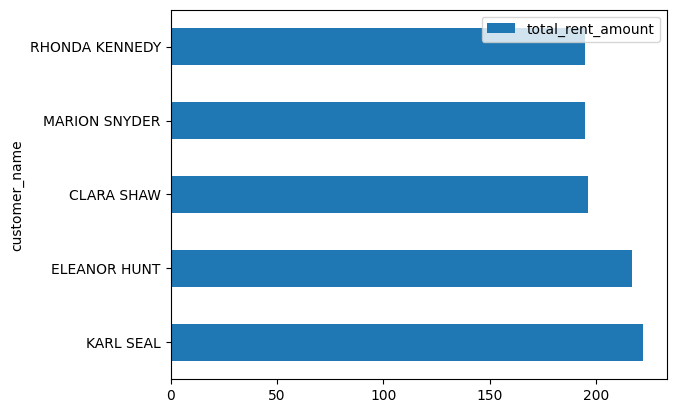

In [ ]:
#using the top_10 paying customer df to make an with top 5
top_5_top_paying_customers = top_10_paying_customers.df().head(5)

#concatinating the customer name from first_name and last_name 
top_5_top_paying_customers["customer_name"] = top_5_top_paying_customers["first_name"] + " " + top_5_top_paying_customers["last_name"]

#plotting the graph in horisontial bar
# top_5_top_paying_customers.plot(
#     kind="barh",
#     x= "customer_name",
#     y="total_rent_amount"
    
# )


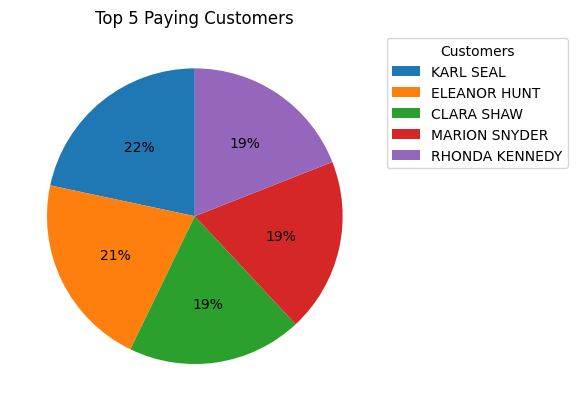

In [430]:
#pie chart 
pie_chart = top_5_top_paying_customers.plot(
    kind="pie",
    y="total_rent_amount",
    #removes the names and the numnbers around the pie chart - asked UML for this 
    labels=[""]*len(top_5_top_paying_customers["customer_name"]),
    autopct="%1.0f%%",
    startangle=90,
    # removes the y - label text 
    ylabel="",        
    title="Top 5 Paying Customers"
)

#styling and moving the legend 
pie_chart.legend(
    title = "Customers", 
    bbox_to_anchor = [1,1], 
    labels=top_5_top_paying_customers["customer_name"]
)

#### b) How much money does each film category bring in? Make a bar chart showing total revenue per film category

join category -> film_category -> film -> inventory -> rental ->
payment

In [417]:
#solving the connection in the database
#adding category as well to get the name of the category

income_per_film_category = duckdb.sql("""
--sql
SELECT 
ca.name as film_category_name,
SUM(p.amount) as earnings
                                      
FROM main.category ca                                    
INNER JOIN main.film_category fc ON fc.category_id = ca.category_id
INNER JOIN main.film f ON f.film_id = fc.film_id
INNER JOIN main.inventory i ON i.film_id = f.film_id
INNER JOIN main.rental r ON r.inventory_id = i.inventory_id
INNER JOIN main.payment p ON p.rental_id = r.rental_id
GROUP BY film_category_name, ca.category_id
ORDER BY earnings DESC, film_category_name

;
""")

income_per_film_category.df()

,film_category_name,earnings
0,Sports,5314.21
1,Sci-Fi,4756.98
2,Animation,4656.30
3,Drama,4587.39
4,Comedy,4383.58
5,Action,4375.85
6,New,4351.62
7,Games,4281.33
8,Foreign,4270.67
9,Family,4226.07


<Axes: >

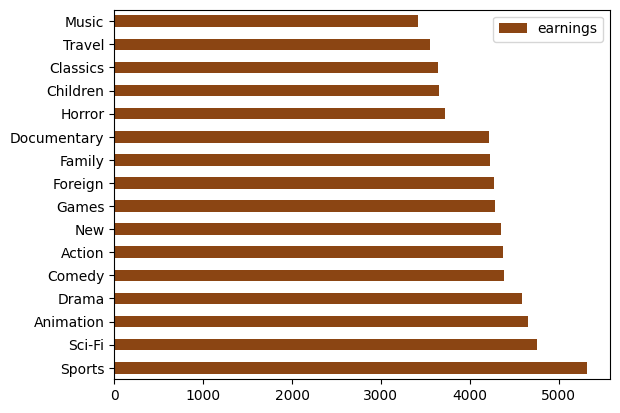

In [471]:

# plotting the graph in a horizontal bar 
income_per_film_category.df().plot(
    kind="barh",
    x="film_category_name",
    y="earnings",
    color = "saddlebrown", 
    ylabel= ""

)
